In [71]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import glob
import matplotlib.pyplot as plt

# Import History Data for analysis

In [122]:
pwd

'C:\\Users\\aczd087\\Downloads'

In [63]:
glob.glob('t1dual_inphase_all_orgs_grey_lvl_256_*')

['t1dual_inphase_all_orgs_grey_lvl_256_optm_adam_loss_dice_wght_trn_samp_sz_250_btch_sz_3_lr_0.001_time_2019-10-19_history',
 't1dual_inphase_all_orgs_grey_lvl_256_optm_adam_loss_dice_wght_trn_samp_sz_250_btch_sz_3_lr_0.01_time_2019-10-19_history',
 't1dual_inphase_all_orgs_grey_lvl_256_optm_adam_loss_dice_wght_trn_samp_sz_250_btch_sz_3_lr_0.1_time_2019-10-19_history',
 't1dual_inphase_all_orgs_grey_lvl_256_optm_adam_loss_dice_wght_trn_samp_sz_250_btch_sz_5_lr_0.001_time_2019-10-19_history',
 't1dual_inphase_all_orgs_grey_lvl_256_optm_adam_loss_dice_wght_trn_samp_sz_250_btch_sz_5_lr_0.01_time_2019-10-19_history',
 't1dual_inphase_all_orgs_grey_lvl_256_optm_adam_loss_dice_wght_trn_samp_sz_250_btch_sz_5_lr_0.1_time_2019-10-19_history',
 't1dual_inphase_all_orgs_grey_lvl_256_optm_adam_loss_focal_loss_trn_samp_sz_250_btch_sz_3_lr_0.001_time_2019-10-19_history',
 't1dual_inphase_all_orgs_grey_lvl_256_optm_adam_loss_focal_loss_trn_samp_sz_250_btch_sz_3_lr_0.01_time_2019-10-19_history',
 't1d

In [113]:
pickle_dictionary=[]
add_info=[('learn_rate',0),('samp_sz',2),('btch_sz',4),('loss_type',8)]
for file in glob.glob('t1dual_inphase_all_orgs_grey_lvl_256_*'):
    
    if os.path.getsize(file) > 0:
        print('file found:',file)
        with open(file, "rb") as f:
            unpickler = pickle.Unpickler(f)
            file_dict = unpickler.load()
            
        split_vals=file.split('_')
        split_vals.sort()
    
        for param_k,param_v in add_info:
            
            file_dict[param_k]=split_vals[param_v]
        
        pickle_dictionary.append(file_dict)
    else:
        print('no values in data:',file)


    
    #print(file_dict['btch_sz'])
    #print(file_dict['learn_rate'])
    #print(file_dict['samp_sz'])
    #print(file_dict['loss'])
    

file found: t1dual_inphase_all_orgs_grey_lvl_256_optm_adam_loss_dice_wght_trn_samp_sz_250_btch_sz_3_lr_0.001_time_2019-10-19_history
file found: t1dual_inphase_all_orgs_grey_lvl_256_optm_adam_loss_dice_wght_trn_samp_sz_250_btch_sz_3_lr_0.01_time_2019-10-19_history
file found: t1dual_inphase_all_orgs_grey_lvl_256_optm_adam_loss_dice_wght_trn_samp_sz_250_btch_sz_3_lr_0.1_time_2019-10-19_history
file found: t1dual_inphase_all_orgs_grey_lvl_256_optm_adam_loss_dice_wght_trn_samp_sz_250_btch_sz_5_lr_0.001_time_2019-10-19_history
file found: t1dual_inphase_all_orgs_grey_lvl_256_optm_adam_loss_dice_wght_trn_samp_sz_250_btch_sz_5_lr_0.01_time_2019-10-19_history
file found: t1dual_inphase_all_orgs_grey_lvl_256_optm_adam_loss_dice_wght_trn_samp_sz_250_btch_sz_5_lr_0.1_time_2019-10-19_history
no values in data: t1dual_inphase_all_orgs_grey_lvl_256_optm_adam_loss_focal_loss_trn_samp_sz_250_btch_sz_3_lr_0.001_time_2019-10-19_history
file found: t1dual_inphase_all_orgs_grey_lvl_256_optm_adam_loss_foc

In [91]:
len(pickle_dictionary)

11

# Plotting training and validation data for analysis

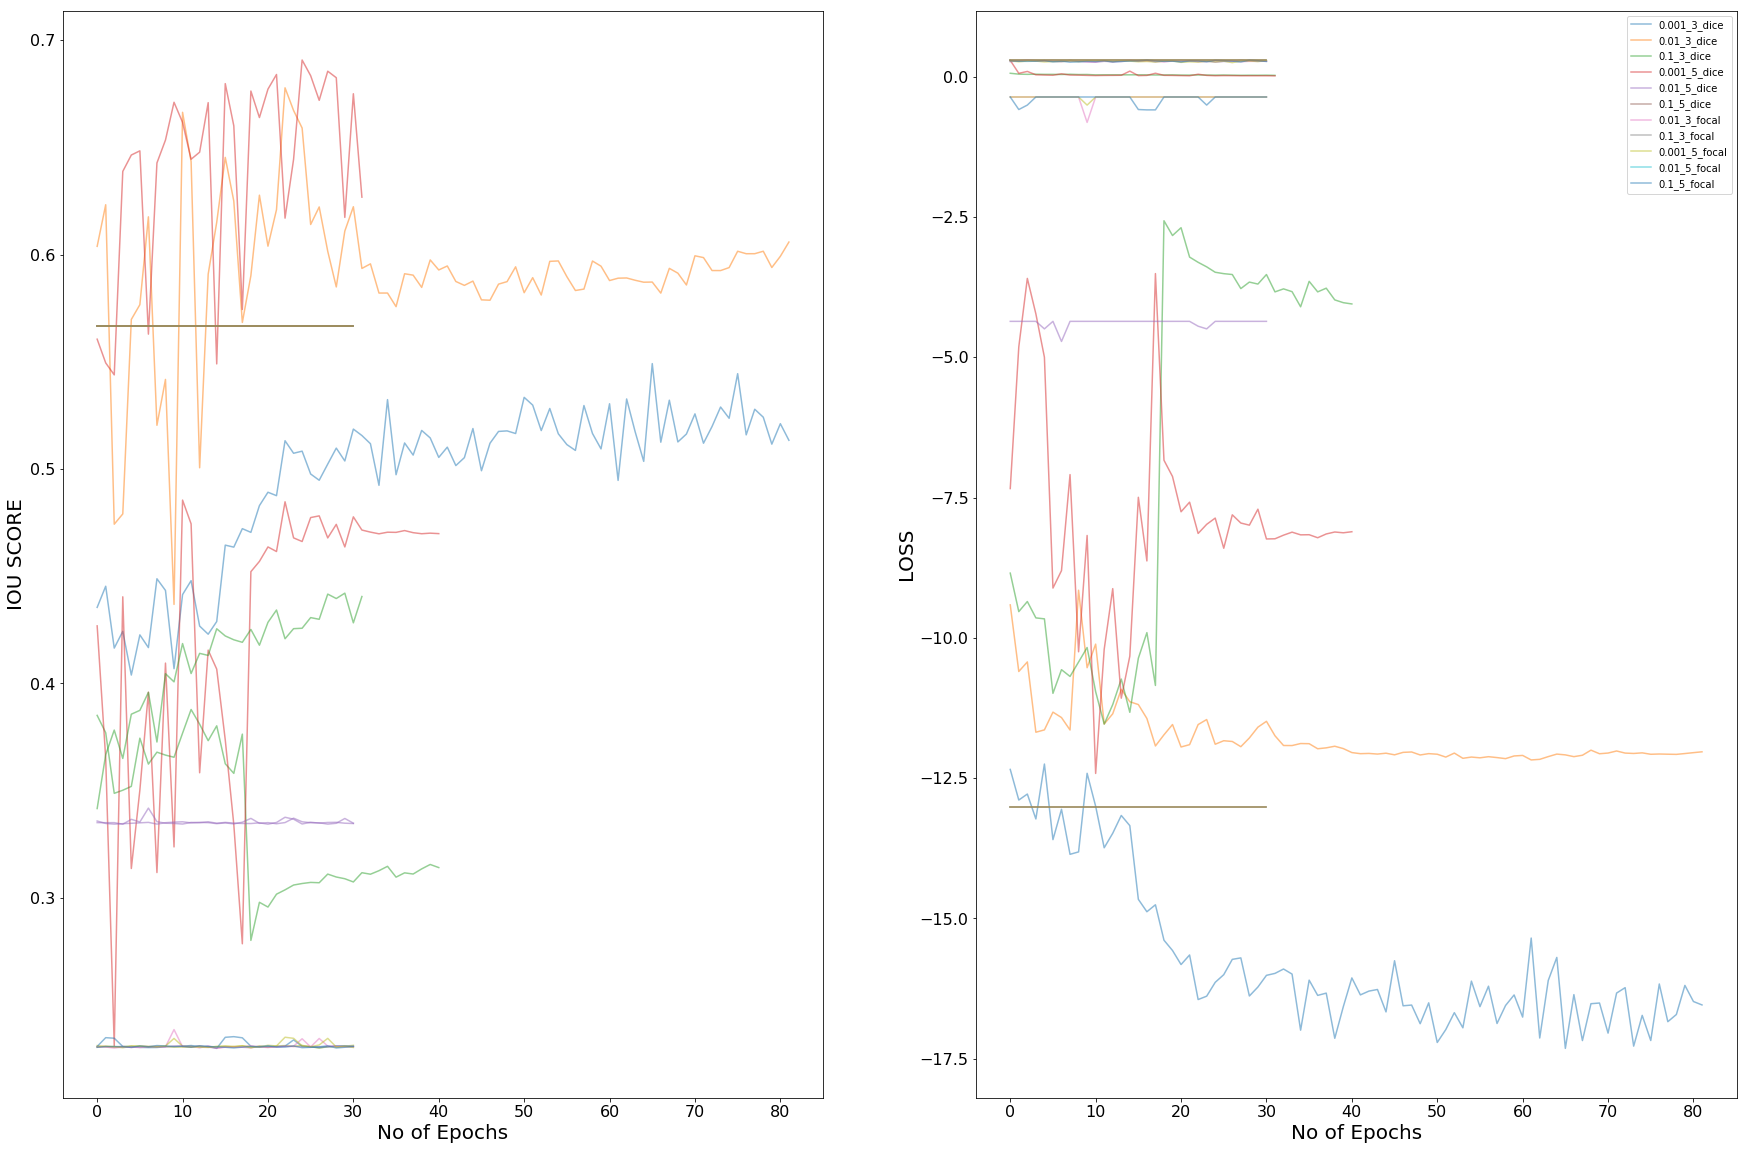

In [121]:

fig,axes=plt.subplots(1,2,figsize=(30,20))
leg_nms=[]
for info in pickle_dictionary:
    #tmp dictionary values
    iou_info_val=[info['iou_score'],info['val_iou_score']]
    loss_info_val=[info['loss'],info['val_loss']]
 
    #print(val_iou)
    str_nm='_'.join([info['learn_rate'],info['btch_sz'],info['loss_type']])
    leg_nms.append(str_nm)
       
    [axes[0].plot(np.arange(len(i)),i,alpha=0.5) for i in iou_info_val]
    [axes[1].plot(np.arange(len(i)),i,alpha=0.5) for i in loss_info_val]
    
axes[0].set_ylabel('IOU SCORE',fontsize=20)
axes[1].set_ylabel('LOSS',fontsize=20)
[axes_val.set_xlabel('No of Epochs',fontsize=20) for axes_val in axes]
[axes_val.tick_params(axis='both', which='major', labelsize=16) for axes_val in axes]

plt.legend(leg_nms)

plt.show()

In [72]:

# Plot training & validation iou_score values
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history_reload.history['iou_score'])
plt.plot(history_reload.history['val_iou_score'])
plt.title('Model iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history_reload.history['loss'])
plt.plot(history_reload.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [ ]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])